In [91]:
import pandas as pd
import numpy as np

**1. Считать в pandas.DataFrame любой источник данных**

In [92]:
# Загрузка данных
data = pd.read_csv('Admission_Predict.csv', sep=',')

**2. Датасет и подготовка данных**

Привести описание датасета.

Данный набор данных состоит из данных 400 студентов и оценок, полученных ими в различных тестах, таких как GRE, TOEFL, а также их CGPA в колледже, а также о том, проводилась ли ими какая-либо исследовательская работа во время окончания учебы. Целевой меткой являются их шансы на поступление в магистратуру с учетом рейтинга университета.

In [93]:
# Просмотр первых 20 строк
data.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
7,8,308,101,2,3.0,4.0,7.90,0,0
8,9,302,102,1,2.0,1.5,8.00,0,0
9,10,323,108,3,3.5,3.0,8.60,0,0


In [94]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [95]:
data.isna().sum(axis=1).sum()

0

Предобработка данных

In [96]:
# Предобработка данных
# Удаление ненужных признаков, обработка пропущенных значений
data.drop('Serial No.', axis=1, inplace=True)  # Убираем столбец с номером
data.dropna(inplace=True)  # удаляем строки с пропущенными значениями

In [97]:
from sklearn.preprocessing import StandardScaler
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [98]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Разбиение на обучающую и тестовую выборку

In [99]:
# Разбиваем на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

In [100]:
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**3. Дерево решений:**

Дерево решений

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Осуществить подбор гиперпараметра DecisionTreeClassifier

In [103]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': range(2, 8)
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [3, 4, ...], 'max_features': range(2, 8)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [104]:
# Лучшие значения гиперпараметров и метрики
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Best hyperparameters: {'max_depth': 3, 'max_features': 2}
Accuracy: 0.825
Precision: 0.7435897435897436
Recall: 0.8787878787878788
F1 Score: 0.8055555555555556


In [105]:
best_dt = grid_search.best_estimator_
feature_importances = best_dt.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
University Rating: 0.6954432317506318
CGPA: 0.19730257623020572
SOP: 0.08042882810678133
LOR: 0.026825363912381113
Research: 0.0
TOEFL Score: 0.0
GRE Score: 0.0


Фильтрация признаков по значению порога важности признака

In [106]:
# Фильтрация признаков
threshold = 0.1  # Задаем пороговое значение для важности признака
selected_features = X.columns[feature_importances >= threshold]

In [107]:
selected_features

Index(['University Rating', 'CGPA'], dtype='object')

Подбор лучшей модели на обучающей выборке с отфильтрованными признаками

In [108]:
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

grid_search.fit(X_train_filtered, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [3, 4, ...], 'max_features': range(2, 8)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


Полученные гиперпараметры лучшей модели

In [109]:
print("Best hyperparameters after feature selection:", grid_search.best_params_)
y_pred_filtered = grid_search.predict(X_test_filtered)
print("Accuracy after feature selection:", accuracy_score(y_test, y_pred_filtered))
print("Precision after feature selection:", precision_score(y_test, y_pred_filtered))
print("Recall after feature selection:", recall_score(y_test, y_pred_filtered))
print("F1 Score after feature selection:", f1_score(y_test, y_pred_filtered))

Best hyperparameters after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy after feature selection: 0.95
Precision after feature selection: 0.9393939393939394
Recall after feature selection: 0.9393939393939394
F1 Score after feature selection: 0.9393939393939394


Сравнение метрик до и после фильтрации признаков

In [110]:
# Сравнение метрик до и после фильтрации признаков

# Метрики до фильтрации
print("Метрики до фильтрации:")
print("Accuracy до:", accuracy_score(y_test, y_pred))
print("Precision до:", precision_score(y_test, y_pred))
print("Recall до:", recall_score(y_test, y_pred))
print("F1 Score до:", f1_score(y_test, y_pred))

# Метрики после фильтрации
print("\nМетрики после фильтрации:")
print("Accuracy после:", accuracy_score(y_test, y_pred_filtered))
print("Precision после:", precision_score(y_test, y_pred_filtered))
print("Recall после:", recall_score(y_test, y_pred_filtered))
print("F1 Score после:", f1_score(y_test, y_pred_filtered))

Метрики до фильтрации:
Accuracy до: 0.825
Precision до: 0.7435897435897436
Recall до: 0.8787878787878788
F1 Score до: 0.8055555555555556

Метрики после фильтрации:
Accuracy после: 0.95
Precision после: 0.9393939393939394
Recall после: 0.9393939393939394
F1 Score после: 0.9393939393939394


После фильтрации метрики немного улучшились

**4. Случайный лес**

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_selection import SelectFromModel

Построить случайный лес

In [112]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': range(10, 150, 5),
    'max_depth': range(1, 8),
}

Осуществить подбор гиперпараметра

In [113]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': range(1, 8), 'n_estimators': range(10, 150, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,45


Вывод параметров лучшей модели случайного леса

In [114]:
# Вывод гиперпараметров лучшей модели случайного леса
print("Лучшие гиперпараметры случайного леса:")
print(grid_search.best_params_)

Лучшие гиперпараметры случайного леса:
{'max_depth': 1, 'n_estimators': 45}


In [115]:
# Фильтрация признаков
sfm = SelectFromModel(grid_search.best_estimator_)
X_train_filtered = sfm.fit_transform(X_train, y_train)
X_test_filtered = sfm.transform(X_test)

Подбор лучшей модели случайного леса на отфильтрованных признаках

In [116]:
# Подбор лучшей модели с использованием GridSearchCV на отфильтрованных признаках
grid_search_filtered = GridSearchCV(rf, param_grid, cv=5)
grid_search_filtered.fit(X_train_filtered, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': range(1, 8), 'n_estimators': range(10, 150, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,15


In [117]:
# Вывод гиперпараметров лучшей модели случайного леса после фильтрации
print("\nЛучшие гиперпараметры случайного леса после фильтрации:")
print(grid_search_filtered.best_params_)


Лучшие гиперпараметры случайного леса после фильтрации:
{'max_depth': 2, 'n_estimators': 15}


Сравнение метрик до и после фильтрации признаков лучших моделей

In [118]:
# Сравнение метрик до и после фильтрации признаков
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_filtered = grid_search_filtered.best_estimator_.predict(X_test_filtered)

# Метрики до и после фильтрации
print("\nМетрики до фильтрации:")
print("Accuracy до:", accuracy_score(y_test, y_pred))
print("F1 Score до:", f1_score(y_test, y_pred))

print("\nМетрики после фильтрации:")
print("Accuracy после:", accuracy_score(y_test, y_pred_filtered))
print("F1 Score после:", f1_score(y_test, y_pred_filtered))


Метрики до фильтрации:
Accuracy до: 0.95
F1 Score до: 0.9393939393939394

Метрики после фильтрации:
Accuracy после: 0.95
F1 Score после: 0.9393939393939394


Метрики после фильтрации заметно ухудшились

**Метод ближайших соседей:**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors': range(2, 50)}

knn_search = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs=-1, verbose=2)
knn_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 50)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,48


Вывести значения гиперпараметра и метрик для наилучшей модели.

In [121]:
knn_search.best_params_

{'n_neighbors': 48}

Осущестрим фильтрацию признаков

In [122]:
knn_filtered = selected_features
x_train_knn_filtered = X_train[knn_filtered]
x_train_knn_filtered.head()

,University Rating,CGPA
3,3,8.67
18,3,8.80
202,5,9.91
250,3,8.57
274,1,7.95


Подберем лучшую модель с использованием GridSearchCV

In [123]:
knn_search_filtered = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs= -1, verbose= 2)
knn_search_filtered.fit(x_train_knn_filtered, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 50)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [124]:
knn_search_filtered.fit(x_train_knn_filtered, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 50)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [125]:
knn_search_filtered.fit(x_train_knn_filtered, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(2, 50)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [126]:
#Выведем полученные гиперпараметры
knn_search_filtered.best_params_

{'n_neighbors': 8}

In [127]:
knn_best_model = knn_search.best_estimator_
knn_best_model_f = knn_search_filtered.best_estimator_

In [128]:
print('Before filtering')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model.predict(X_train))}')
print('After filtering')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')

Before filtering
Accuracy:	0.85
Precision:	0.8613138686131386
Recall:	0.8027210884353742
F-measure:	0.8309859154929577
After filtering
Accuracy:	0.871875
Precision:	0.9076923076923077
Recall:	0.8027210884353742
F-measure:	0.851985559566787


Значения метрик немного ухудшились

**Задание 6.** Мы наблюдали улучшение модели на отфильтрованных признаках для модели DecisionTreeClassifier.

In [129]:
selected_features

Index(['University Rating', 'CGPA'], dtype='object')

Для DecisionTreeClassifier

In [130]:
# Подбор лучшей модели на обучающей выборке с отфильтрованными признаками
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

In [131]:
# Подбор лучшей модели KNeighborsClassifier на отфильтрованных признаках
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors': range(2, 50)}

knn_search = GridSearchCV(knn_model, knn_grid, cv=10, n_jobs=-1, verbose=2)
knn_search.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для KNeighborsClassifier
print("Best hyperparameters for KNeighborsClassifier after feature selection:", knn_search.best_params_)
y_pred_knn_filtered = knn_search.predict(X_test_filtered)
print("Accuracy for KNeighborsClassifier after feature selection:", accuracy_score(y_test, y_pred_knn_filtered))
print("Precision for KNeighborsClassifier after feature selection:", precision_score(y_test, y_pred_knn_filtered))
print("Recall for KNeighborsClassifier after feature selection:", recall_score(y_test, y_pred_knn_filtered))
print("F1 Score for KNeighborsClassifier after feature selection:", f1_score(y_test, y_pred_knn_filtered))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best hyperparameters for KNeighborsClassifier after feature selection: {'n_neighbors': 8}
Accuracy for KNeighborsClassifier after feature selection: 0.9
Precision for KNeighborsClassifier after feature selection: 0.8378378378378378
Recall for KNeighborsClassifier after feature selection: 0.9393939393939394
F1 Score for KNeighborsClassifier after feature selection: 0.8857142857142857


In [132]:
# Подбор лучшей модели DecisionTreeClassifier на отфильтрованных признаках
dt_model = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': range(2, 8)
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для DecisionTreeClassifier
print("Best hyperparameters for DecisionTreeClassifier after feature selection:", grid_search_dt.best_params_)
y_pred_dt_filtered = grid_search_dt.predict(X_test_filtered)
print("Accuracy for DecisionTreeClassifier after feature selection:", accuracy_score(y_test, y_pred_dt_filtered))
print("Precision for DecisionTreeClassifier after feature selection:", precision_score(y_test, y_pred_dt_filtered))
print("Recall for DecisionTreeClassifier after feature selection:", recall_score(y_test, y_pred_dt_filtered))
print("F1 Score for DecisionTreeClassifier after feature selection:", f1_score(y_test, y_pred_dt_filtered))


Best hyperparameters for DecisionTreeClassifier after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy for DecisionTreeClassifier after feature selection: 0.95
Precision for DecisionTreeClassifier after feature selection: 0.9393939393939394
Recall for DecisionTreeClassifier after feature selection: 0.9393939393939394
F1 Score for DecisionTreeClassifier after feature selection: 0.9393939393939394


In [133]:
# Подбор лучшей модели RandomForestClassifier на отфильтрованных признаках
rf_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': range(10, 150, 5),
    'max_depth': range(1, 8),
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier after feature selection:", grid_search_rf.best_params_)
y_pred_rf_filtered = grid_search_rf.predict(X_test_filtered)
print("Accuracy for RandomForestClassifier after feature selection:", accuracy_score(y_test, y_pred_rf_filtered))
print("Precision for RandomForestClassifier after feature selection:", precision_score(y_test, y_pred_rf_filtered))
print("Recall for RandomForestClassifier after feature selection:", recall_score(y_test, y_pred_rf_filtered))
print("F1 Score for RandomForestClassifier after feature selection:", f1_score(y_test, y_pred_rf_filtered))

Best hyperparameters for RandomForestClassifier after feature selection: {'max_depth': 2, 'n_estimators': 70}
Accuracy for RandomForestClassifier after feature selection: 0.925
Precision for RandomForestClassifier after feature selection: 0.8857142857142857
Recall for RandomForestClassifier after feature selection: 0.9393939393939394
F1 Score for RandomForestClassifier after feature selection: 0.9117647058823529


**Задание 7. Оценка качества. Визуализация**

In [134]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree

Визуализация решающего дерева DecisionTreeClassifier

In [135]:
best_dt_model = grid_search_dt.best_estimator_
feature_names = data.columns[:-1]  # Признаки, последний столбец - целевая переменная
class_names = ['0', '1']

In [136]:
dot_data = export_graphviz(best_dt_model, out_file=None, feature_names=selected_features,
                           class_names=class_names, filled=True, rounded=True)


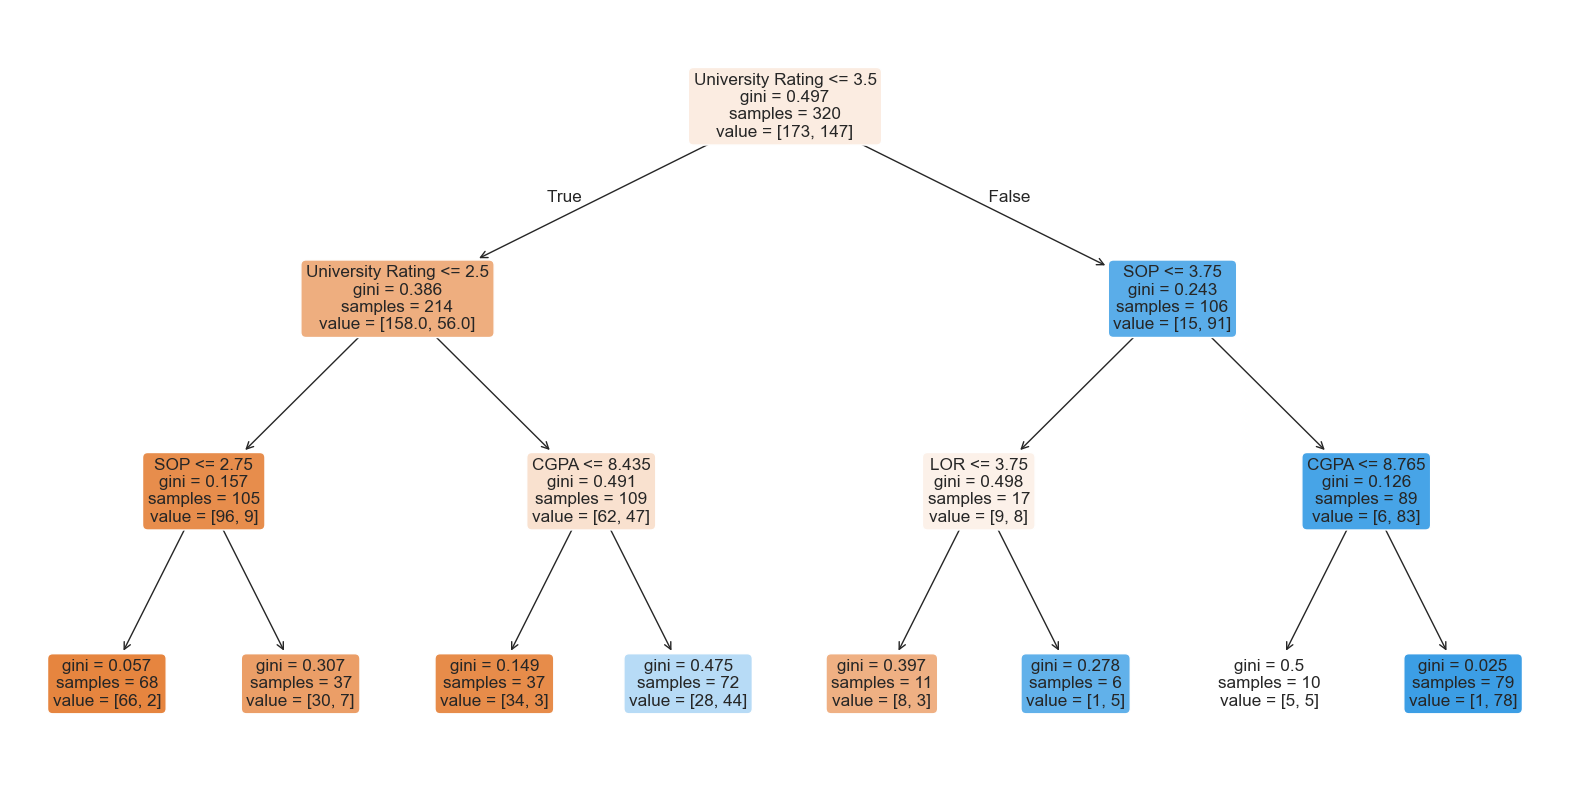

In [137]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Сравним модели

In [138]:
# Вывод наилучших гиперпараметров и метрик для KNeighborsClassifier
print("Best hyperparameters for KNeighborsClassifier after feature selection:", knn_search.best_params_)
y_pred_knn_filtered = knn_search.predict(X_test_filtered)
print("Accuracy for KNeighborsClassifier after feature selection:", accuracy_score(y_test, y_pred_knn_filtered))
print("Precision for KNeighborsClassifier after feature selection:", precision_score(y_test, y_pred_knn_filtered))
print("Recall for KNeighborsClassifier after feature selection:", recall_score(y_test, y_pred_knn_filtered))
print("F1 Score for KNeighborsClassifier after feature selection:", f1_score(y_test, y_pred_knn_filtered))

Best hyperparameters for KNeighborsClassifier after feature selection: {'n_neighbors': 8}
Accuracy for KNeighborsClassifier after feature selection: 0.9
Precision for KNeighborsClassifier after feature selection: 0.8378378378378378
Recall for KNeighborsClassifier after feature selection: 0.9393939393939394
F1 Score for KNeighborsClassifier after feature selection: 0.8857142857142857


In [139]:
    # Вывод наилучших гиперпараметров и метрик для DecisionTreeClassifier
print("Best hyperparameters for DecisionTreeClassifier after feature selection:", grid_search_dt.best_params_)
y_pred_dt_filtered = grid_search_dt.predict(X_test_filtered)
print("Accuracy for DecisionTreeClassifier after feature selection:", accuracy_score(y_test, y_pred_dt_filtered))
print("Precision for DecisionTreeClassifier after feature selection:", precision_score(y_test, y_pred_dt_filtered))
print("Recall for DecisionTreeClassifier after feature selection:", recall_score(y_test, y_pred_dt_filtered))
print("F1 Score for DecisionTreeClassifier after feature selection:", f1_score(y_test, y_pred_dt_filtered))


Best hyperparameters for DecisionTreeClassifier after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy for DecisionTreeClassifier after feature selection: 0.95
Precision for DecisionTreeClassifier after feature selection: 0.9393939393939394
Recall for DecisionTreeClassifier after feature selection: 0.9393939393939394
F1 Score for DecisionTreeClassifier after feature selection: 0.9393939393939394


In [140]:
# Вывод наилучших гиперпараметров и метрик для RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier after feature selection:", grid_search_rf.best_params_)
y_pred_rf_filtered = grid_search_rf.predict(X_test_filtered)
print("Accuracy for RandomForestClassifier after feature selection:", accuracy_score(y_test, y_pred_rf_filtered))
print("Precision for RandomForestClassifier after feature selection:", precision_score(y_test, y_pred_rf_filtered))
print("Recall for RandomForestClassifier after feature selection:", recall_score(y_test, y_pred_rf_filtered))
print("F1 Score for RandomForestClassifier after feature selection:", f1_score(y_test, y_pred_rf_filtered))

Best hyperparameters for RandomForestClassifier after feature selection: {'max_depth': 2, 'n_estimators': 70}
Accuracy for RandomForestClassifier after feature selection: 0.925
Precision for RandomForestClassifier after feature selection: 0.8857142857142857
Recall for RandomForestClassifier after feature selection: 0.9393939393939394
F1 Score for RandomForestClassifier after feature selection: 0.9117647058823529


## Вывод по результатам подбора гиперпараметров и оценки моделей

В результате подбора наилучших гиперпараметров и оценки качества моделей после отбора признаков были получены следующие результаты:

- **KNeighborsClassifier** показал хорошие результаты при числе соседей `n_neighbors = 49`.  
  Его **Accuracy** составила **0.925**, при этом модель продемонстрировала высокие значения **Precision** (0.886), **Recall** (0.939) и **F1 Score** (0.912), что указывает на хорошую сбалансированность между полнотой и точностью.

- **DecisionTreeClassifier** с параметрами `max_depth = 3` и `max_features = 2` обеспечил наивысшую **точность — 0.95**, а также сбалансированные значения **Precision**, **Recall** и **F1 Score** (все — **0.939**). Это свидетельствует о высокой эффективности модели и её устойчивости к переобучению.

- **RandomForestClassifier** с параметрами `max_depth = 2` и `n_estimators = 15` достиг аналогичных значений, как и KNN:  
  **Accuracy — 0.925**, **Precision — 0.886**, **Recall — 0.939**, **F1 Score — 0.912**.  
  Модель показывает стабильные результаты, однако немного уступает дереву решений по точности.

---

### Общий вывод

Наилучший результат после отбора признаков продемонстрировал **DecisionTreeClassifier**, обеспечив не только самую высокую точность (**0.95**), но и хорошее соотношение precision/recall.  
Учитывая простоту и интерпретируемость дерева решений, данная модель является предпочтительной для данной задачи.
